In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

def filtering_func(freqs, fft, f1, f2): #passing complex numbers
    n = max(np.abs(fft))
    filtered_fft = fft.copy() #in this way it doesn't reference to fft

    fft_in_range = np.abs(fft[(freqs >= f1) & (freqs <= f2) | (freqs >= -f2) & (freqs <= -f1)])
    print(f'fft_in_range: {fft_in_range/n} ')

    peak = np.max(fft_in_range)

    peak_indices = np.where(fft_in_range == peak)[0]
    print(f"peak_indices: {peak_indices}")

    print(f"fft[peak_indices]: {fft_in_range[peak_indices]/n}")

    peak_f = freqs[(freqs >= f1) & (freqs <= f2) | (freqs >= -f2) & (freqs <= -f1)][peak_indices]
    print(f"peak_f: {peak_f}")

    fft_in_range[peak_indices] = np.nan
    range_avg = np.nanmean(fft_in_range) #compute the mean excluding the point you are filtering
    print(f'range_avg: {range_avg/n}')

    print(f'sum: {np.sum(np.isin(freqs, peak_f))}') #make sure you are filtering only 1 frequency
    filtered_fft[np.isin(freqs, peak_f)] = complex(range_avg, 0)
    range_avg = range_avg/n
    return filtered_fft, range_avg, peak_f

In [41]:
hour = '15.42'
day = '08082024'

In [42]:
file = f"../../Waveforms/{day}/{day}_{hour}/{day}_{hour}_wf.csv/{day}_{hour}_wf_01.csv"

df = pd.read_csv(file)
times = pd.to_numeric(df.iloc[1:, 0], errors = 'coerce').values
amplitudes = pd.to_numeric(df.iloc[1:, 1], errors='coerce').values

In [43]:
N = len(times)
print(f"len(times): {N}")

len(times): 62504


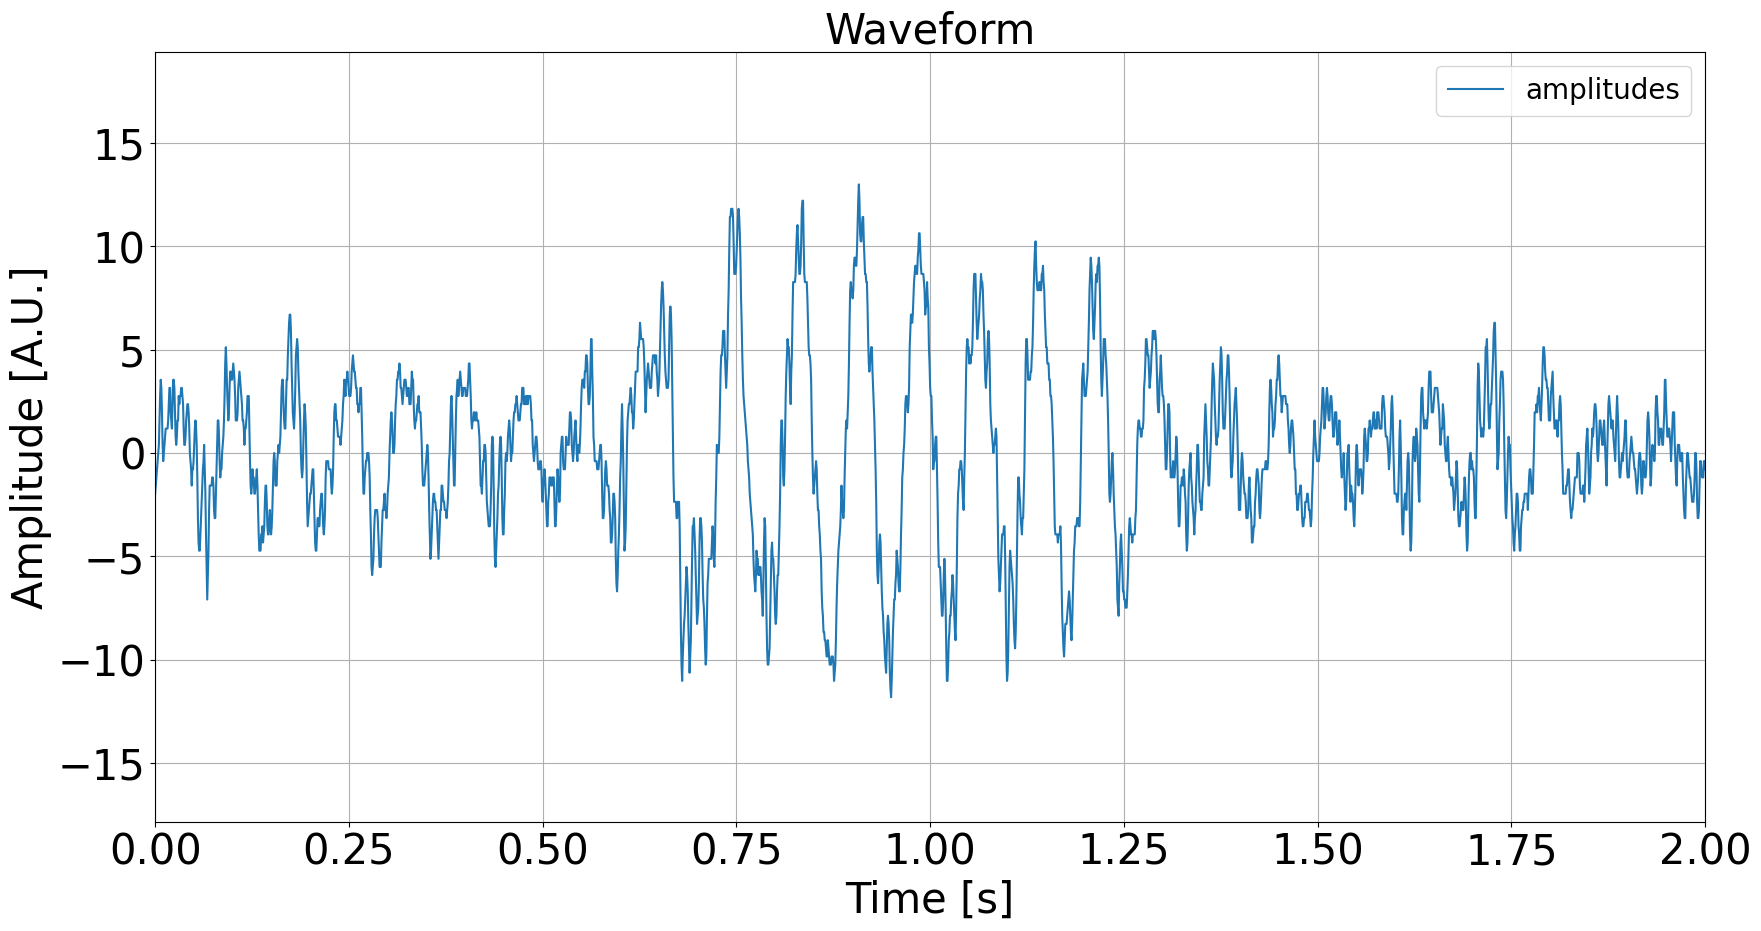

In [44]:
plt.figure(figsize = (20, 10))
plt.plot(times, amplitudes, label = 'amplitudes')

plt.title('Waveform', fontsize = 30)
plt.xlabel('Time [s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlim(0, 2)
plt.legend(loc = 'best', fontsize = 20)
plt.grid(True)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## FFT

In [45]:
span = times[-1]
print(f"span: {span}") 
f_s = len(times) / span
print(f"f_s = {f_s}")
freqs = fft.fftfreq(len(times), 1/f_s) #window lenght, sample spacing
print(f'last freq: {freqs[-1]}') ##this should be the half of f_s.
print(f"len(freqs): {len(freqs)}")
print(freqs)

span: 50.00240067
f_s = 1250.0199822905822
last freq: -0.019999039778103515
len(freqs): 62504
[ 0.          0.01999904  0.03999808 ... -0.05999712 -0.03999808
 -0.01999904]


In [46]:
magnitudes = fft.fft(amplitudes) #when i'm filtering, i'm filtering something complex
n = np.max(np.abs(magnitudes))

phases = np.angle(magnitudes)

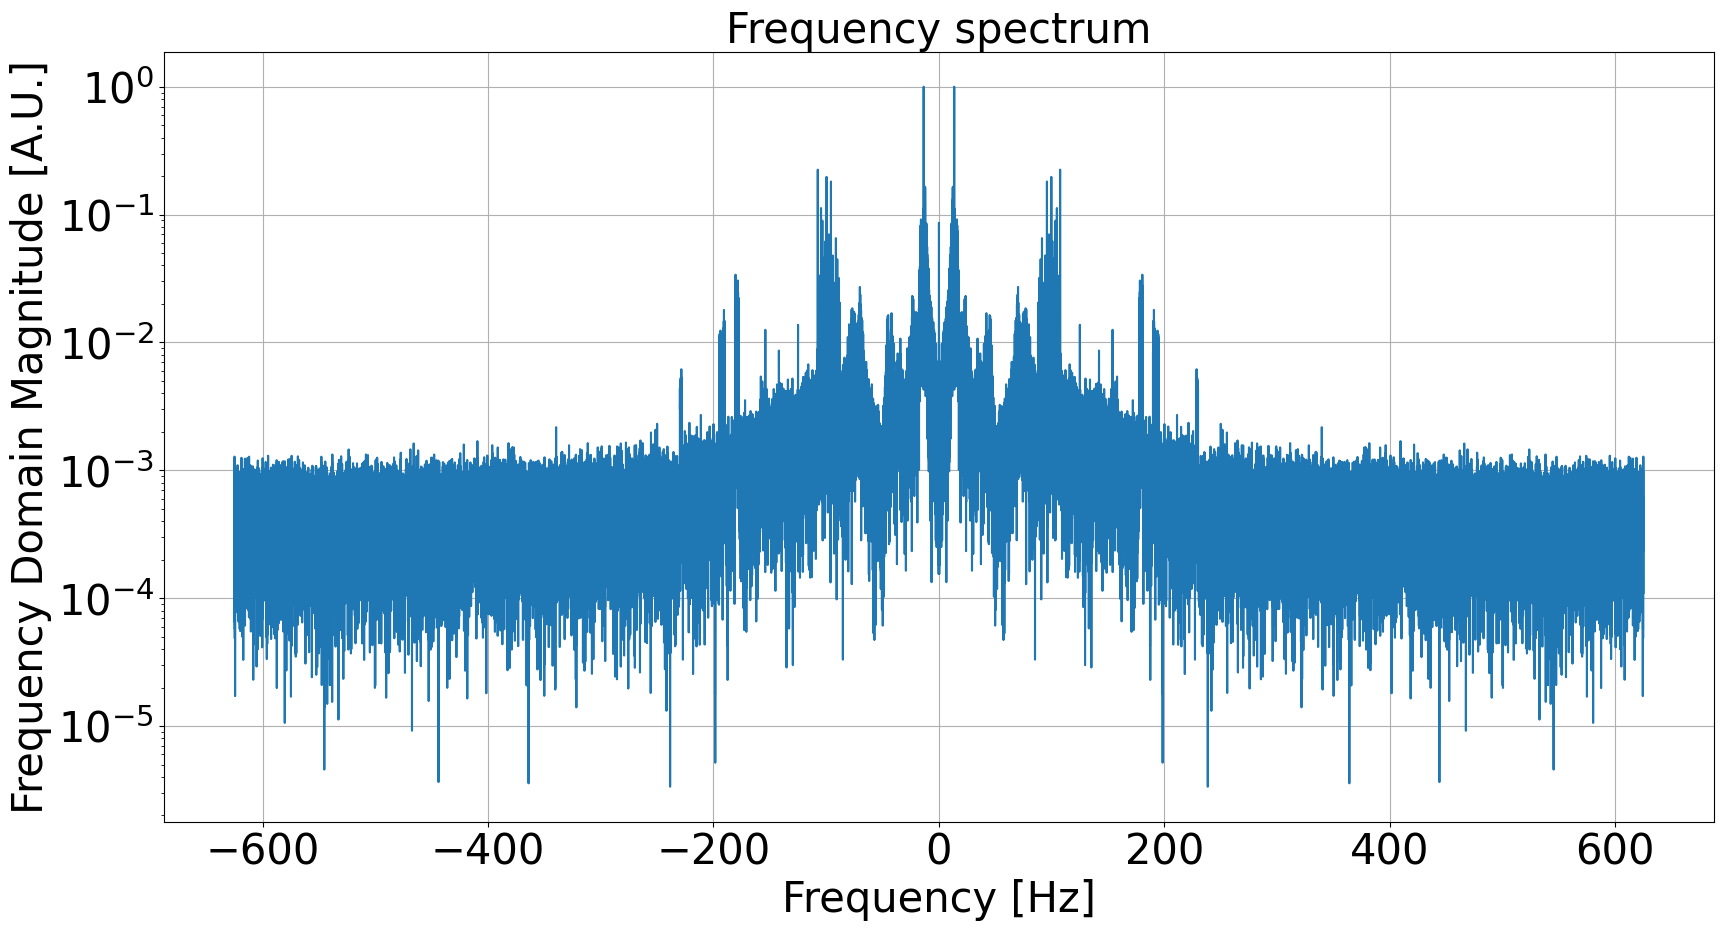

In [62]:
freqs_shifted = fft.fftshift(freqs)
magnitudes_shifted = fft.fftshift(magnitudes)

plt.figure(figsize=(20, 10))
plt.plot(freqs_shifted, np.abs(magnitudes_shifted)/n)
plt.title('Frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [Hz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.semilogy()
plt.grid(True)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [48]:
if (N%2 == 0):
    pos_freqs = freqs[:round((N/2))]
    pos_magnitudes = magnitudes[:round((N/2))]
    pos_phases = phases[:round((N/2))]
    pos_amplitudes = amplitudes[:round((N/2))]
else:
    pos_freqs = freqs[:round((N-1)/2 + 1)]
    pos_magnitudes = magnitudes[:round((N-1)/2 + 1)]
    pos_phases = phases[:round((N-1)/2 + 1)]
    pos_amplitudes = amplitudes[:round((N-1)/2 + 1)]

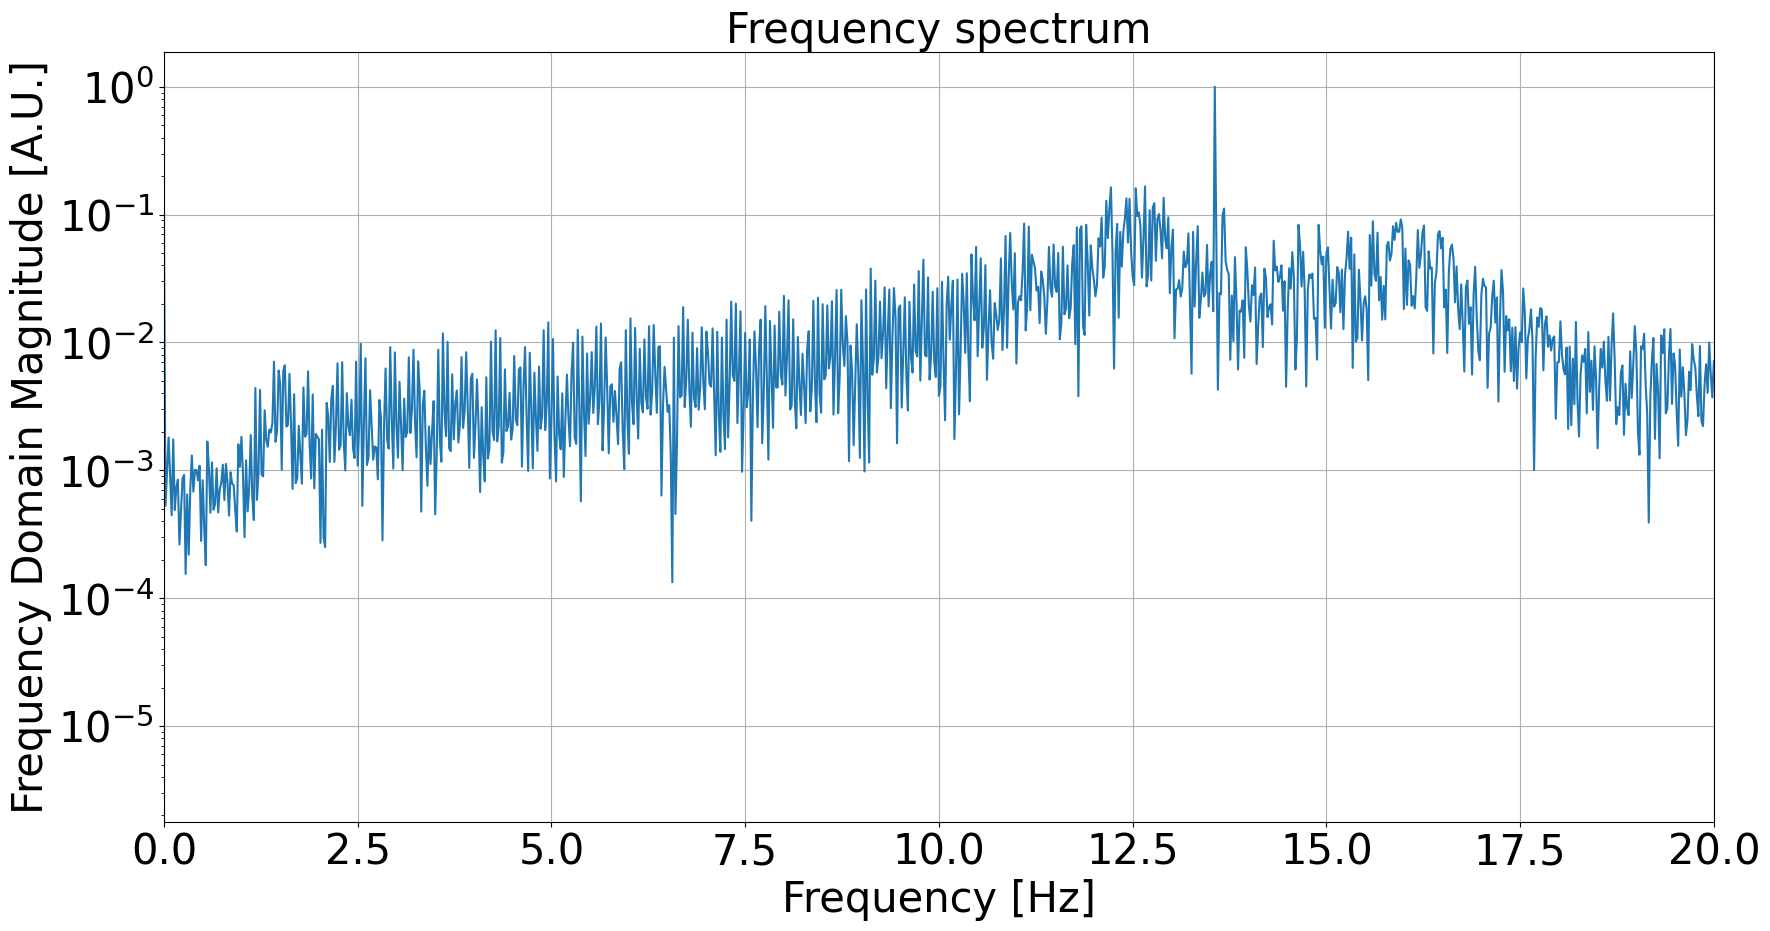

In [125]:
plt.figure(figsize=(20, 10))
plt.plot(pos_freqs, np.abs(pos_magnitudes)/n)
plt.title('Frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [Hz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.semilogy()
plt.xlim(0, 20)
plt.grid(True)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

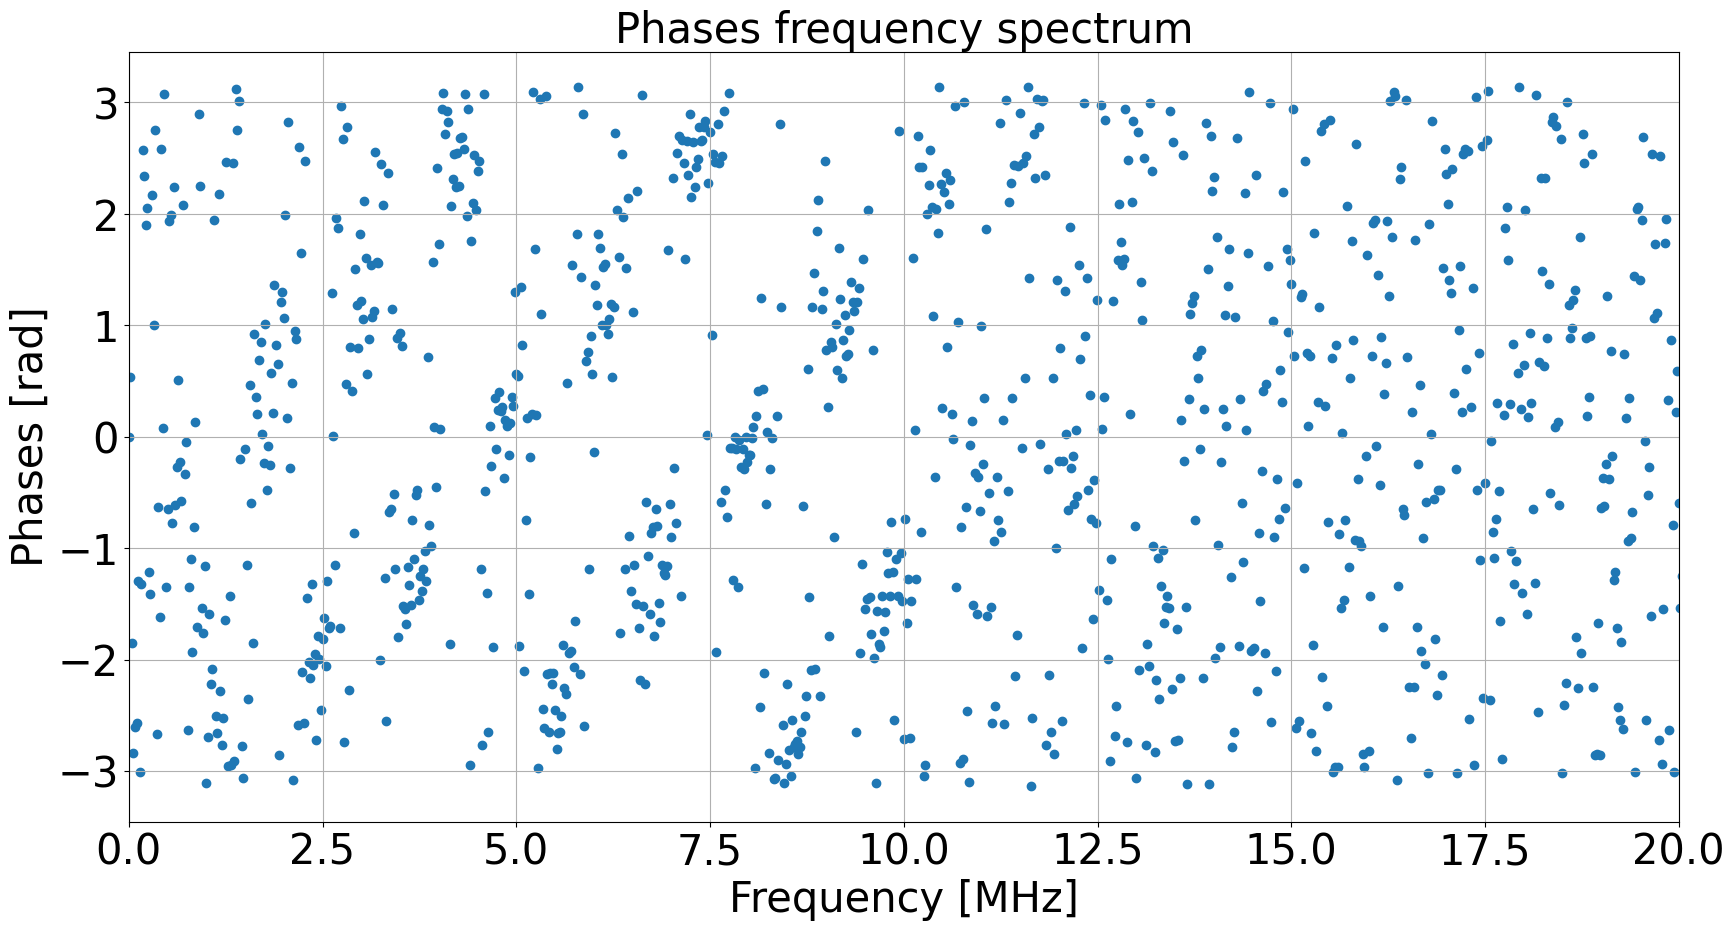

In [105]:
plt.figure(figsize=(20, 10))
#plt.errorbar(freqs, avg_fft_au, yerr = stds_fft, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1)
plt.scatter(pos_freqs, pos_phases)

plt.title('Phases frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Phases [rad]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
#plt.ylim(-0.5, 0.5)
plt.xlim(0, 20)

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [50]:
f1 = 13
f2 = 14

In [106]:
print(f"positive peak phase: {pos_phases[(pos_freqs >= f1) & (pos_freqs <= f2)][np.argmax(pos_magnitudes[(pos_freqs <= f2) & (pos_freqs >= f1)])]*180/np.pi}")

positive peak phase: 19.324525707928867


## Filtering

In [51]:
filtered_fft, range_avg, peak_f = filtering_func(freqs, magnitudes, f1, f2)

fft_in_range: [0.0762168  0.0107635  0.02603205 0.02633249 0.03072497 0.02287136
 0.02632188 0.05140665 0.03874703 0.04172169 0.07139024 0.01945083
 0.00569868 0.07319668 0.01907562 0.04363482 0.08118695 0.01557017
 0.02146168 0.03524504 0.02287368 0.02414727 0.05788075 0.0191659
 0.03458166 0.04279556 0.01753028 1.         0.06547901 0.00427301
 0.02437413 0.02379473 0.09789789 0.11156967 0.04304974 0.03706389
 0.0343587  0.00732546 0.0232713  0.0102553  0.04655226 0.02073687
 0.00615002 0.0177695  0.01746198 0.02140888 0.00758249 0.05552346
 0.03690097 0.01927078 0.01927078 0.03690097 0.05552346 0.00758249
 0.02140888 0.01746198 0.0177695  0.00615002 0.02073687 0.04655226
 0.0102553  0.0232713  0.00732546 0.0343587  0.03706389 0.04304974
 0.11156967 0.09789789 0.02379473 0.02437413 0.00427301 0.06547901
 1.         0.01753028 0.04279556 0.03458166 0.0191659  0.05788075
 0.02414727 0.02287368 0.03524504 0.02146168 0.01557017 0.08118695
 0.04363482 0.01907562 0.07319668 0.00569868 0.01

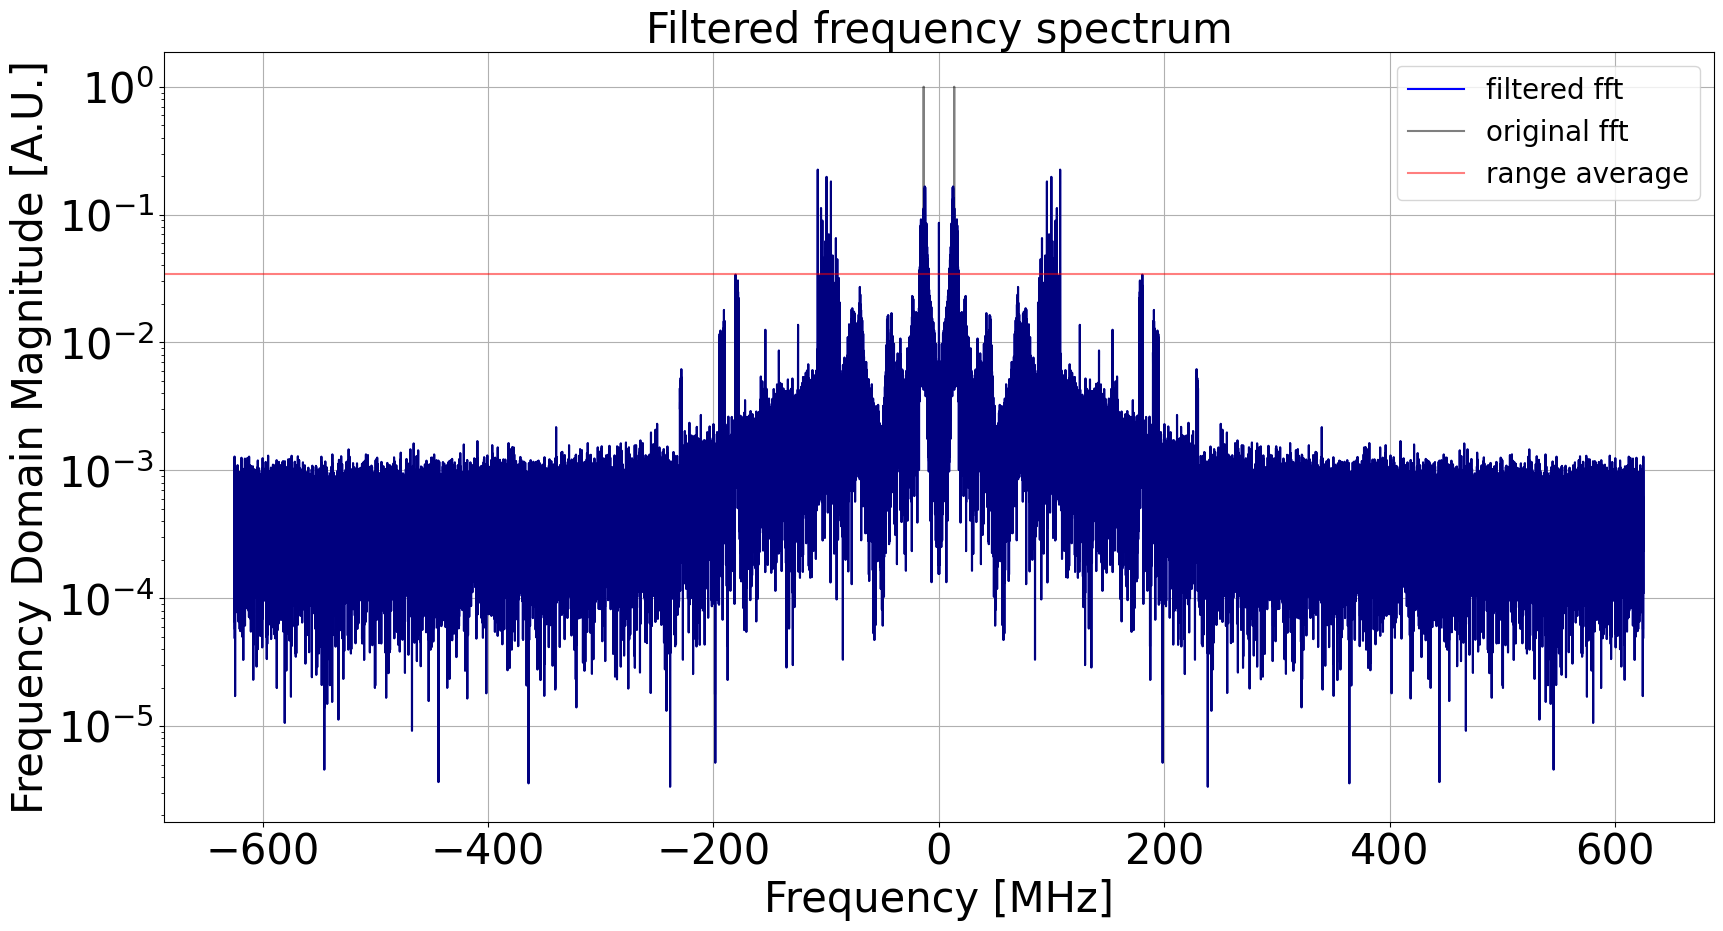

In [107]:
filtered_fft_shifted = fft.fftshift(filtered_fft)

plt.figure(figsize=(20, 10))
plt.plot(freqs_shifted, np.abs(filtered_fft_shifted)/n, color = 'blue', label = 'filtered fft')
plt.plot(freqs_shifted, np.abs(magnitudes_shifted)/n, alpha = 0.5, color = 'k', label = 'original fft')
plt.axhline(range_avg, color = 'red', alpha = 0.5, label = 'range average')

plt.title('Filtered frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
#plt.xlim(-f2, f2)
plt.semilogy()
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [53]:
if (N%2 == 0):
    pos_filtered_fft = filtered_fft[:round((N/2))]
else:
    pos_filtered_fft = filtered_fft[:round((N-1)/2 + 1)]

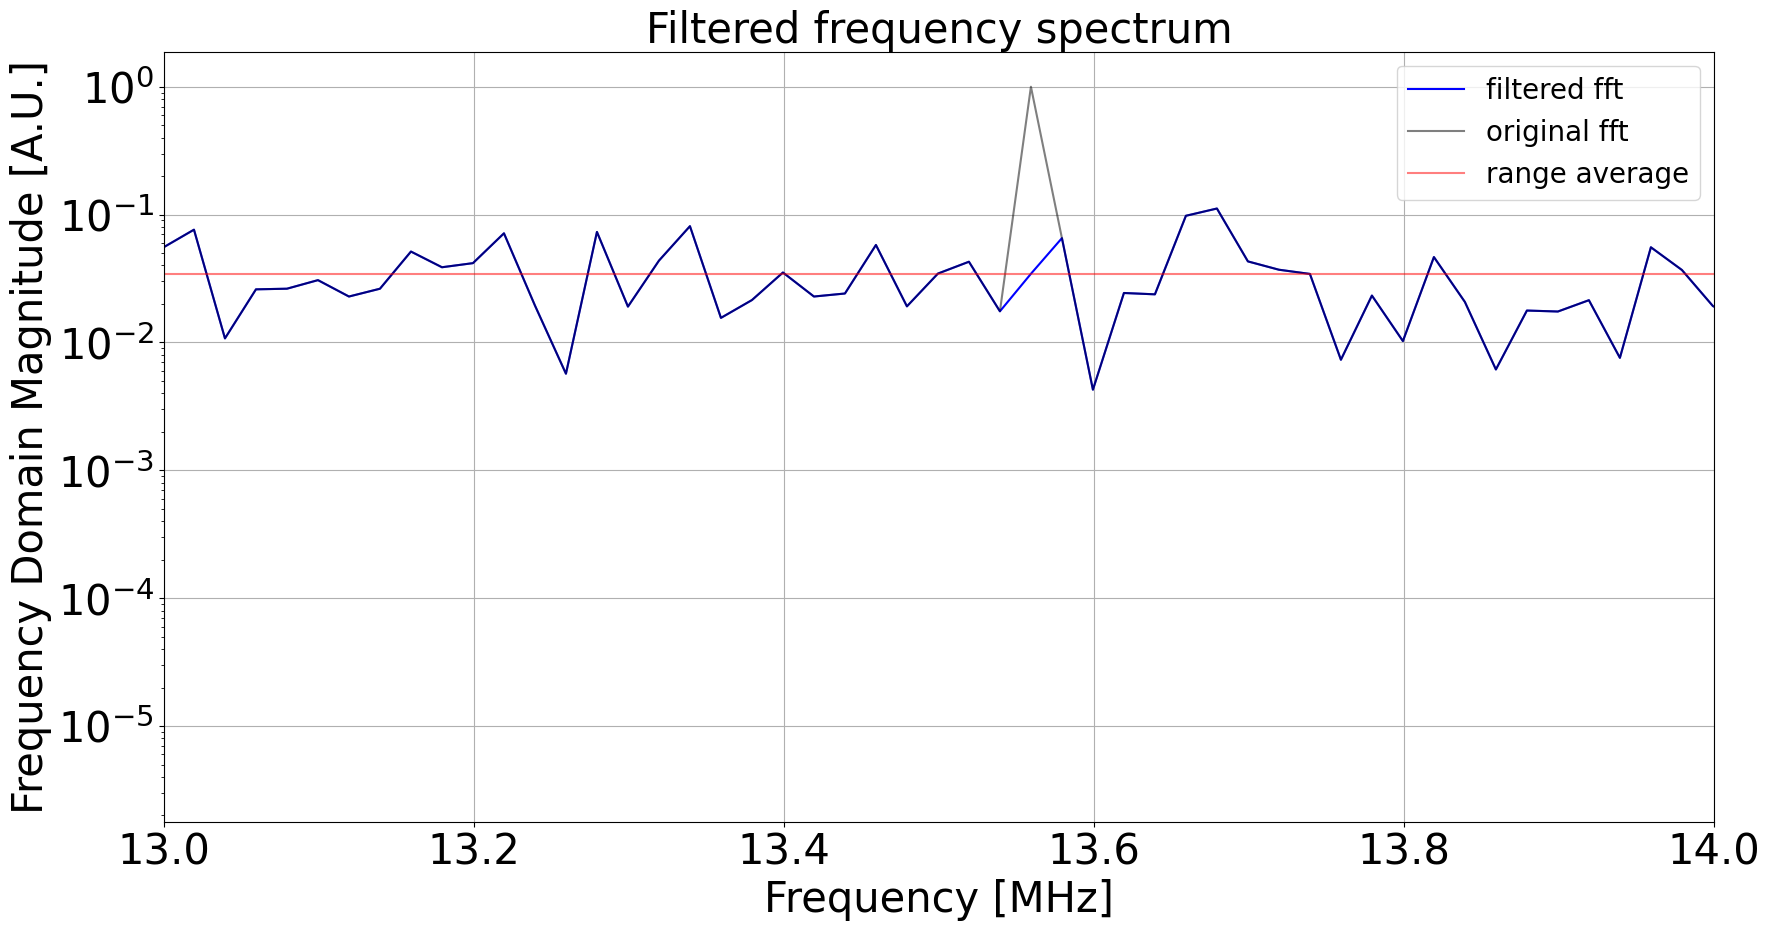

In [109]:
plt.figure(figsize=(20, 10))
plt.plot(pos_freqs, np.abs(pos_filtered_fft)/n, color = 'blue', label = 'filtered fft')
plt.plot(pos_freqs, np.abs(pos_magnitudes)/n, alpha = 0.5, color = 'k', label = 'original fft')
plt.axhline(range_avg, color = 'red', alpha = 0.5, label = 'range average')

plt.title('Filtered frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(f1, f2)
plt.legend(loc = 'best', fontsize = 20)
plt.semilogy()

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## IFFT

In [110]:
#times_ifft = np.arange(N) / f_s #it's right but it's the SAME as times
filtered_amplitudes = fft.ifft(filtered_fft) #complex numbers, whole spectrum

## Compare to reconstructed waveform

In [111]:
reconstructed_wf = fft.ifft(magnitudes) #complex numbers, whole spectrum

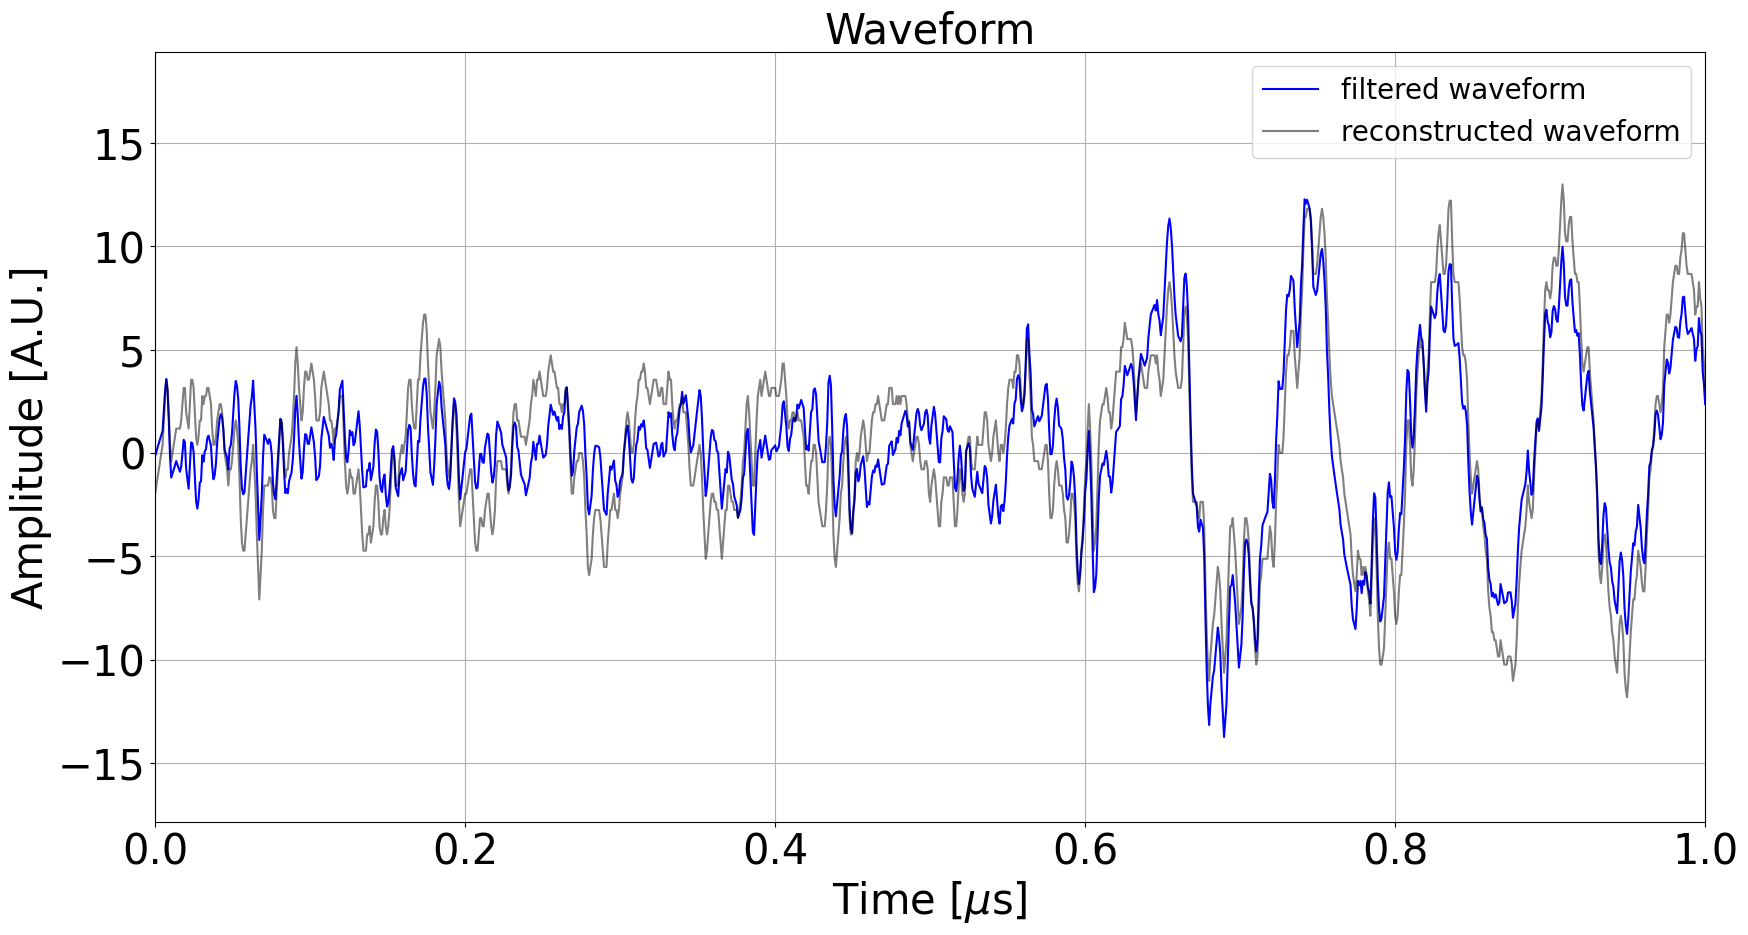

In [113]:
plt.figure(figsize = (20, 10))
plt.plot(times, filtered_amplitudes.real, label = 'filtered waveform', color = 'blue') #why real?
plt.plot(times, reconstructed_wf.real, label = 'reconstructed waveform', color = 'k', alpha = 0.5)

plt.title('Waveform', fontsize = 30)
plt.xlabel(r'Time [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [117]:
noise_wf = reconstructed_wf - filtered_amplitudes

In [118]:
A = max(noise_wf.real)
phi = phases[freqs == peak_f[0]]
f = peak_f[0]
coswave = A*np.cos(f * 2*np.pi*times + phi)

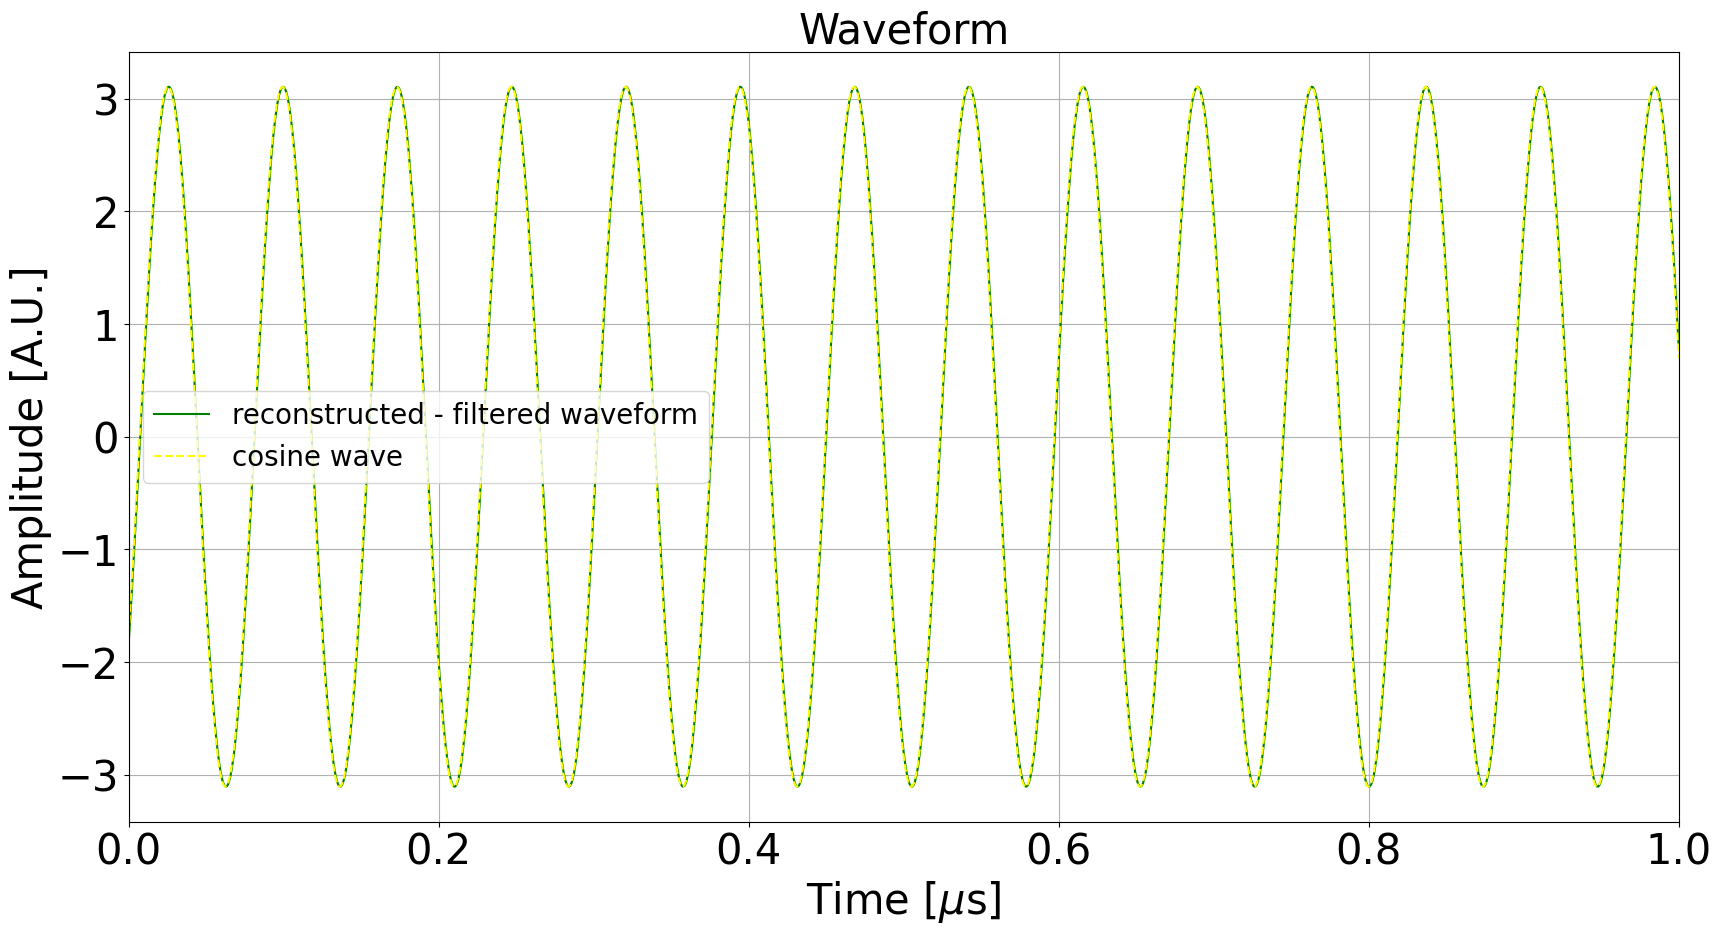

In [119]:
plt.figure(figsize = (20, 10))
plt.plot(times, noise_wf.real, label = 'reconstructed - filtered waveform', color = 'green')
plt.plot(times, coswave, label = 'cosine wave', color = 'yellow', linestyle = '--')

plt.title('Waveform', fontsize = 30)
plt.xlabel(r'Time [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

# Make sure reconstructed waveform and original waveform are the same

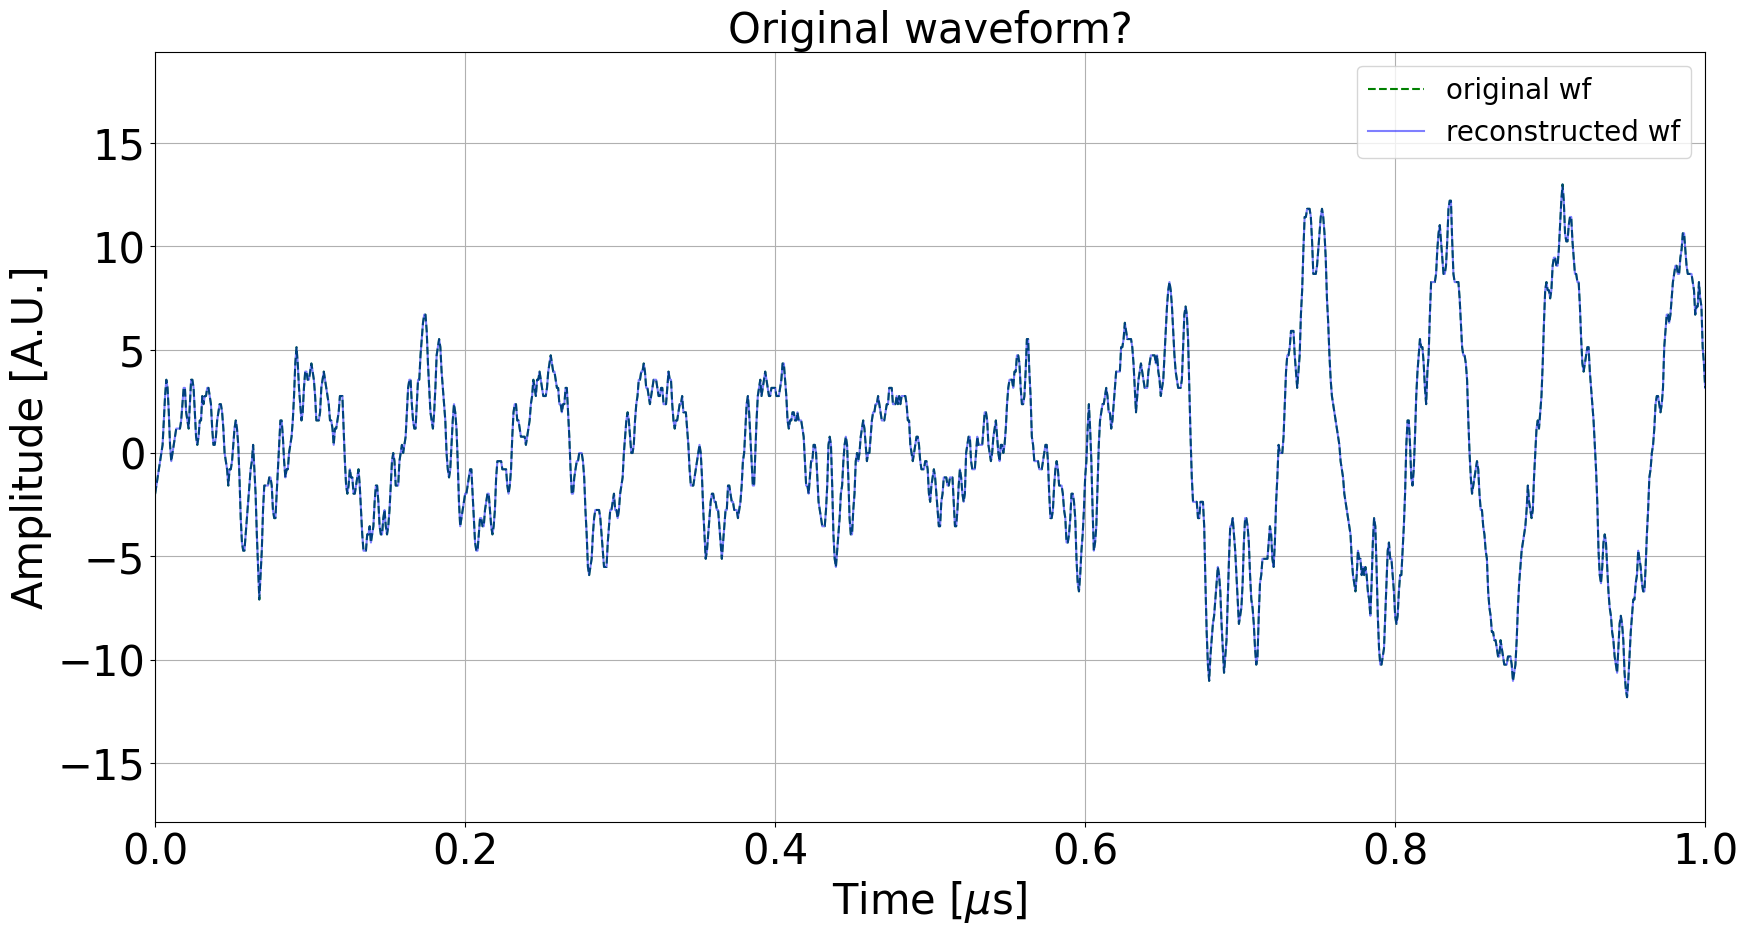

In [84]:
plt.figure(figsize = (20, 10))
plt.plot(times, amplitudes, label = 'original wf', color = 'green', linestyle = '--')
plt.plot(times, reconstructed_wf.real, label = 'reconstructed wf', color = 'blue', alpha = 0.5)

plt.title('Original waveform?', fontsize = 30)
plt.xlabel(r'Time [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

# Plot reconstructed fft

In [85]:
reconstructed_filtered_fft = fft.fft(filtered_amplitudes)

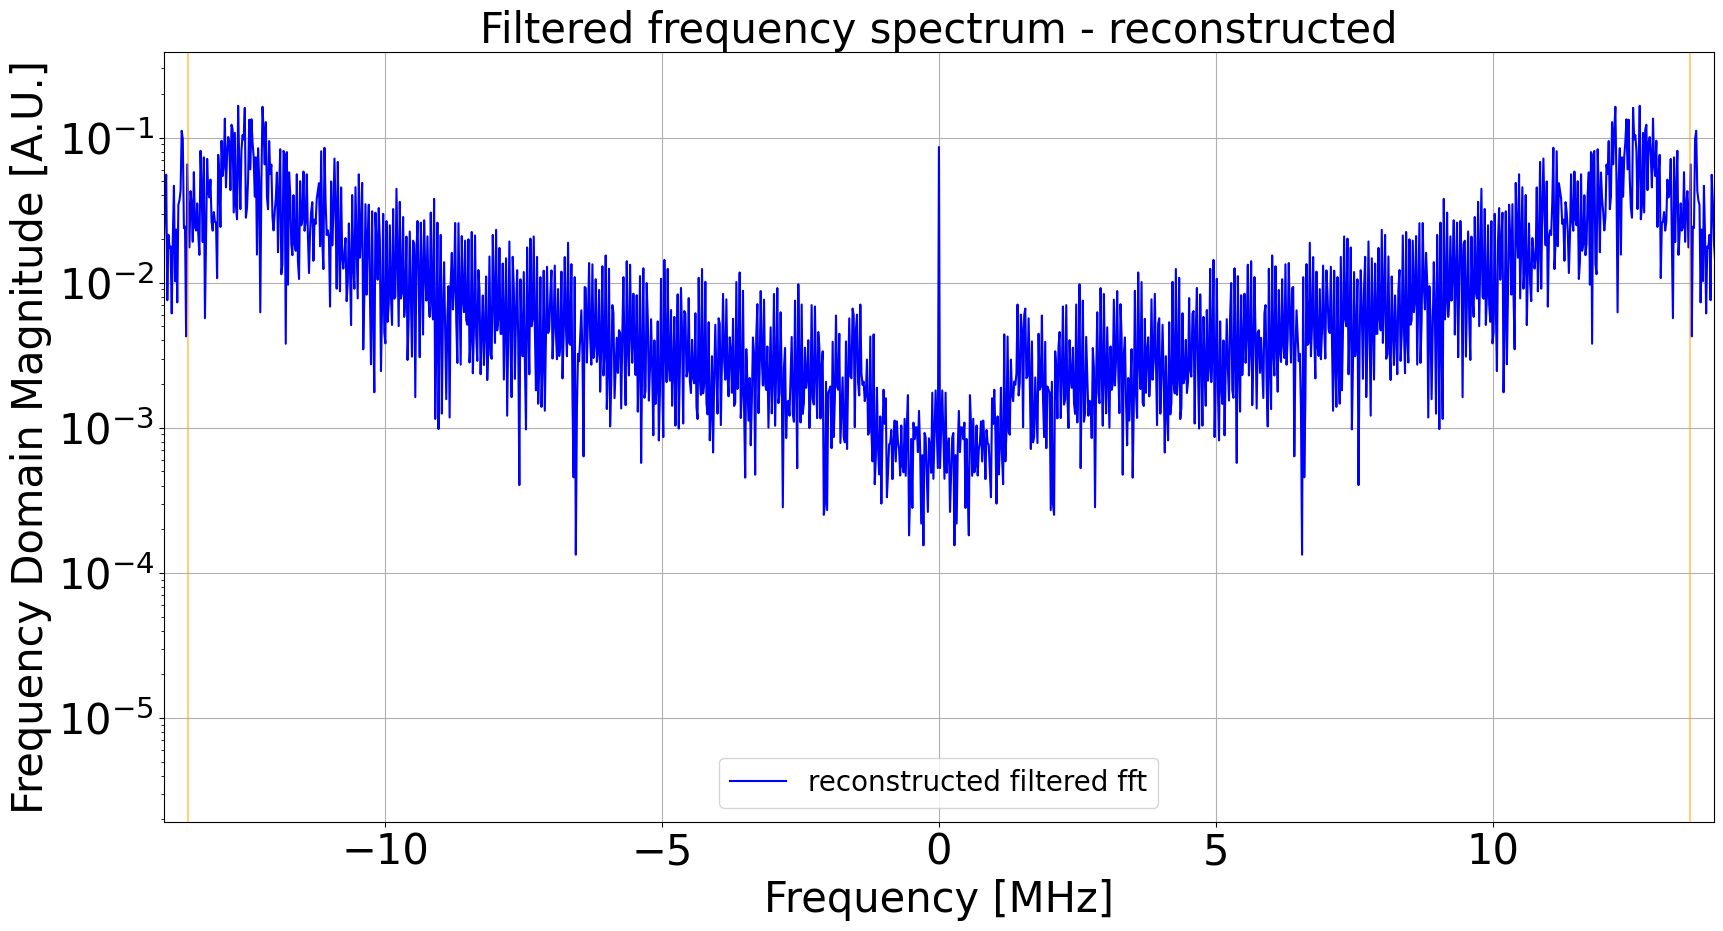

In [97]:
reconstructed_filtered_fft_shifted = fft.fftshift(reconstructed_filtered_fft) 

plt.figure(figsize=(20, 10))
plt.plot(freqs_shifted, np.abs(reconstructed_filtered_fft_shifted)/n, color = 'blue', label = 'reconstructed filtered fft')
plt.axvline(peak_f[0], color = 'orange', alpha = 0.5)
plt.axvline(peak_f[1], color = 'orange', alpha = 0.5)

plt.title('Filtered frequency spectrum - reconstructed', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(-f2, f2)
plt.legend(loc = 'best', fontsize = 20)
plt.semilogy()

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [121]:
if (N%2 == 0):
    pos_reconstructed_filtered_fft = reconstructed_filtered_fft[:round((N/2))]
else:
    pos_reconstructed_filtered_fft = reconstructed_filtered_fft[:round((N-1)/2 + 1)]

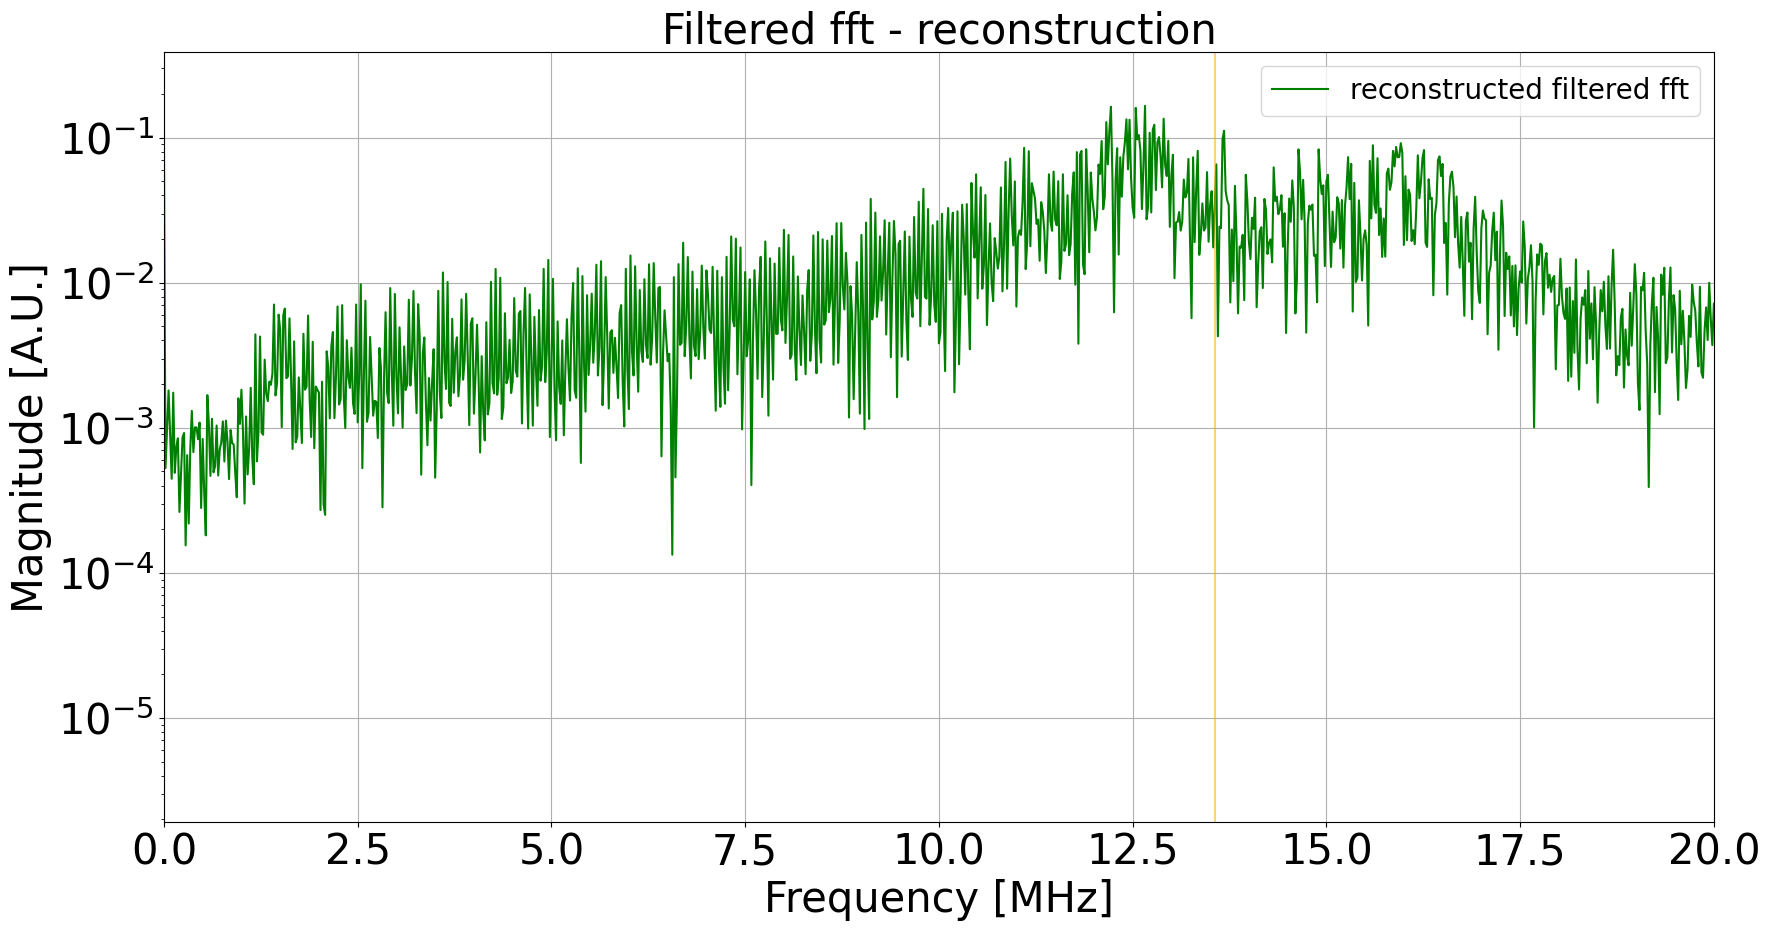

In [129]:
plt.figure(figsize = (20, 10))
plt.plot(pos_freqs, np.abs(pos_reconstructed_filtered_fft)/n, label = 'reconstructed filtered fft', color = 'green')
plt.axvline(peak_f[0], color = 'orange', alpha = 0.5)

plt.title('Filtered fft - reconstruction', fontsize = 30)
plt.xlabel(r'Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.semilogy()

plt.xlim(0, 20)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()